In [1]:
from vpython import *


<IPython.core.display.Javascript object>

In [3]:
scene = canvas(width=800, height=600, title='Dipolo en campo uniforme')

ele = 0.05
theta = pi/4

k = 8.99e9   # constante de Coulomb
q1 = 3e-6    # carga positiva en coulombs
q2 = -3e-6   # carga negativa en coulombs
m = 0.01     # masa del dipolo
E0 = 1e-5    # magnitud del campo constante

p = ele * q1 # magnitud del dipolo eléctrico

r1 = vector((ele/2)*cos(theta), (ele/2)*sin(theta), 0)   # carga positva
r2 = vector(-(ele/2)*cos(theta), -(ele/2)*sin(theta), 0) # carga negativa


q1 = sphere(pos=r1, radius = 0.005, color=color.red)
q2 = sphere(pos=r2, radius = 0.005, color=color.blue)
line = cylinder(pos=r1, radius=0.0015, axis=r2, color=color.white)

# placas
box(pos=vector(-ele*2,0,0), size=vector(0.005,0.1,0.1), color=color.red)
box(pos=vector(ele*2,0,0), size=vector(0.005,0.1,0.1), color=color.blue)
# lineas de campo
arrow(pos=vector(-ele*2,0.04,0), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,0.04,-0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,0.04,0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,0), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,-0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)

dt = 100  # tiempo en pasos
t_max = dt*215
t = 0        # iniciar el tiempo

while t < t_max:
    rate(80)
    
    dtheta = (dt**2 * 6 * p * E0 ) / (m * ele**2)
    theta -= dtheta
    
    q1.pos = vector((ele/2)*cos(theta), (ele/2)*sin(theta), 0)
    q2.pos = vector(-(ele/2)*cos(theta), -(ele/2)*sin(theta),0)
    line.pos = q1.pos
    line.axis = 2*q2.pos

    t = t + dt

<IPython.core.display.Javascript object>

In [3]:
from vpython import *
import numpy as np

scene2 = canvas(width=800, height=600, title='Dipolo en campo uniforme')

# Assign constants
charge = 1
distance = 1
k = 8.99 * 10 ** 9

# Making the particles
positive_part = sphere(pos=vector(0, 0, 0), q=1, radius=0.2, color=color.cyan)

negative_part = sphere(pos=vector(1, 0, 0), q=-1, radius=0.2, color=color.yellow)

# # Step 10 - Move y position of dipole particles
# positive_part.pos.y = 2
# negative_part.pos.y = 2

# Steps 3-6
# test_particle = sphere(pos=vector(3,4,0), radius=0.1)
#
# # Calculate distance
# r_pos = test_particle.pos - positive_part.pos
# r_neg = test_particle.pos - negative_part.pos
#
# # Calculate electric field
# elec_field_pos = k * positive_part.q * (r_pos / (mag(r_pos)**3) )
# elec_field_neg = k * negative_part.q * (r_neg / (mag(r_neg)**3) )
#
# total_elec_field = elec_field_pos + elec_field_neg
#
# # Make arrow
# test_arrow = arrow(pos=vector(3,4,0), axis= (1*10**-8)*total_elec_field)


# Define function to plot test particles

def plot_test_particle(test_position):
    sphere(pos=test_position, radius=0.1, color=color.red)

    r_pos = test_position - positive_part.pos
    r_neg = test_position - negative_part.pos

    elec_field_pos = k * positive_part.q * (r_pos / (mag(r_pos) ** 3))
    elec_field_neg = k * negative_part.q * (r_neg / (mag(r_neg) ** 3))

    total_elec_field = elec_field_pos + elec_field_neg

    arrow(pos=test_position, axis=(1 * 10 ** -8) * total_elec_field)


plot_test_particle(vector(3, 4, 0))

# Plot 16 arrows in the xy plane

count = 1
radius = 5
theta = radians(360 / 16)

while count < 16:
    count += 1

    # Plotting test charges in xy plane
    position_xy = radius * vector(np.cos(theta), np.sin(theta), 0)
    position_xy.x = radius * np.cos(theta*count)
    position_xy.y = radius * np.sin(theta*count)

    # Plotting test charges in xz plane
    position_xz = radius * vector(np.cos(theta), 0, np.sin(theta))
    position_xz.x = radius * np.cos(theta*count)
    position_xz.z = radius * np.sin(theta*count)

    plot_test_particle(position_xy)
    plot_test_particle(position_xz)

<IPython.core.display.Javascript object>

In [72]:
#!pip install scipy

In [73]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [33]:
def angle_dipole(t, theta, I, p, E):
    # componentes
    x, y, z = theta[0:3]
    # velocidades (angulares)
    vx, vy, vz = theta[3:6]
    
    # calcular aceleraciones
    ax = p[0] * E[0] * np.sin(x) / I[0] if I[0] != 0 else 0
    ay = p[1] * E[1] * np.sin(y) / I[1] if I[1] != 0 else 0
    az = p[2] * E[2] * np.sin(z) / I[2] if I[2] != 0 else 0
    
    return [vx, vy, vz, ax, ay, az]

def moment_inertia(n, l):
    return np.array([m * l[0]**2, m * l[1]**2, m * l[2]**2]) / 12

In [160]:
tStart = 0
tEnd = 103300

ele = 0.05

#k = 8.99e9   # constante de Coulomb
q1 = 3e-6    # carga positiva en coulombs
q2 = -q1     # carga negativa en coulombs
m = 0.01     # masa del dipolo

theta = np.array([np.pi/4, 0, 0])
omega = np.array([0, 0, 0])

r1 = np.array([(ele/2)*cos(theta[0]), (ele/2)*sin(theta[0]), 0])    # carga positva
r2 = np.array([-(ele/2)*cos(theta[0]), -(ele/2)*sin(theta[0]), 0])  # carga negativa

E = np.array([1e-5, 0, 0])  # solo hay en el eje x
l = r2-r1
p = l*q1

I = moment_inertia(m, l)

solution = integrate.solve_ivp(angle_dipole, 
                               [tStart, tEnd], [theta[0], theta[1], theta[2], omega[0], omega[1], omega[2]], 
                               method='RK45', t_eval=np.linspace(tStart, tEnd, 10001),
                               args=(I, p, E))

In [106]:
I

array([1.04166667e-06, 1.04166667e-06, 0.00000000e+00])

In [107]:
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-03 ...  1.000e+04  1.000e+04]
        y: [[ 7.854e-01  7.854e-01 ... -7.560e-01 -7.560e-01]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            ...
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 908
     njev: 0
      nlu: 0

In [140]:
solution.y[3]

array([ 0.00000000e+00, -7.19999914e-07, -1.43999931e-06, ...,
       -3.23984631e-05, -3.16961634e-05, -3.09938611e-05])

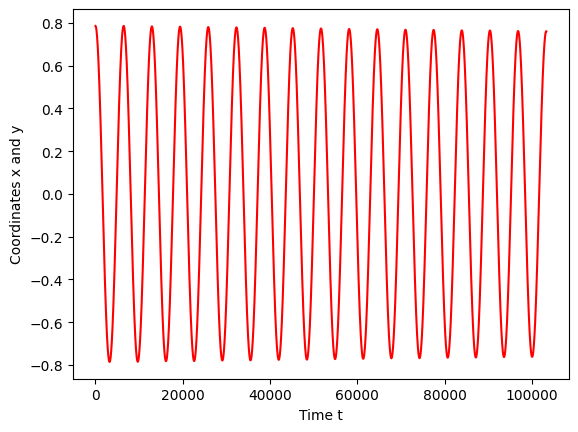

In [161]:
plt.xlabel('Time t')
plt.ylabel('Coordinates x and y')

plt.plot(solution.t, solution.y[0], 'red')
#plt.plot(solution.t, solution.y[3], 'blue')

In [176]:
scene3 = canvas(width=800, height=600, title='Dipolo en campo uniforme')

<IPython.core.display.Javascript object>

In [177]:

r1_q1 = vector(r1[0], r1[1], r1[2])   # carga positva
r2_q2 = vector(r2[0], r2[1], r2[2])   # carga negativa


q1_sphere = sphere(pos=r1_q1, radius = 0.005, color=color.red)
q2_sphere = sphere(pos=r2_q2, radius = 0.005, color=color.blue)
line = cylinder(pos=r1_q1, radius=0.0015, axis=r2_q2, color=color.white)

# placas
box(pos=vector(-ele*2,0,0), size=vector(0.005,0.1,0.1), color=color.red)
box(pos=vector(ele*2,0,0), size=vector(0.005,0.1,0.1), color=color.blue)
# lineas de campo
arrow(pos=vector(-ele*2,0.04,0), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,0.04,-0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,0.04,0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,0), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,-0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)
arrow(pos=vector(-ele*2,-0.04,0.035), radius=0.0009, axis=2*vector(ele*2-0.0002,0,0), color=color.yellow, 
      shaftwidth=0.001, headwidth=0.005, headlength=0.01, opacity=0.5)

i = 0
for t in solution.t:
    rate(500)

    theta = solution.y[0][i]
    q1_sphere.pos = vector((ele/2)*cos(theta), (ele/2)*sin(theta), 0)
    q2_sphere.pos = vector(-(ele/2)*cos(theta), -(ele/2)*sin(theta),0)
    line.pos = q1_sphere.pos
    line.axis = 2*q2_sphere.pos

    i += 1
